In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import numpy as numpy
import pandas as pd , scipy, numpy as np #import the required libraries
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 
#from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split,KFold
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM, RNN, GRU 
from keras.layers.core import Dropout, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D, Convolution2D, MaxPooling2D
from keras import layers
import keras
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/dataset_sdn.csv")
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [ ]:
to_drop = ['dt']
data = data.drop(to_drop, axis='columns')
data = data[data['pktrate'] !=0

In [ ]:
 
data['src'] = [int(i.split('.')[3]) for i in data['src']]#extracting the last two digits 
data['dst'] = [int(i.split('.')[3])for i in data['dst']]#extracting the last two digits
data['switch'] = data['switch'].astype(str) 
data['src'] = data['src'].astype(str)
data['dst'] = data['dst'].astype(str)
data['port_no'] = data['port_no'].astype(str)
data['Protocol'] = data['Protocol'].astype(str)

In [ ]:
data_order = pd.get_dummies(data,columns = ['switch','src','Protocol','dst','port_no'])
data_order

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,switch_1,switch_10,switch_2,switch_3,switch_4,switch_5,switch_6,switch_7,switch_8,switch_9,src_1,src_10,src_11,src_12,src_13,src_14,src_15,src_16,src_17,src_18,src_2,src_20,src_3,src_4,src_5,src_6,src_7,src_8,src_9,Protocol_ICMP,Protocol_TCP,Protocol_UDP,dst_1,dst_10,dst_11,dst_12,dst_13,dst_14,dst_15,dst_16,dst_17,dst_18,dst_2,dst_3,dst_4,dst_5,dst_6,dst_7,dst_8,dst_9,port_no_1,port_no_2,port_no_3,port_no_4,port_no_5
0,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,143928631,3917,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
19468,30229,32224114,67,129000000,6.712900e+10,2,7894,13421,14306786,447,0,4932,176357784,0,3838.0,3838.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
19469,30229,32224114,67,129000000,6.712900e+10,2,7894,13421,14306786,447,0,5522,454906628,0,3838.0,3838.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
19470,30229,32224114,67,129000000,6.712900e+10,2,7894,13421,14306786,447,0,32456962,276816532,3838,0.0,3838.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
19471,30229,32224114,67,129000000,6.712900e+10,2,7894,13421,14306786,447,0,4934,363123228,0,5395.0,5395.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73005,52067,2811618,198,289000000,1.980000e+11,5,25224,8604,464616,286,1,5565957,6379028,246,265.0,511.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
73004,52067,2811618,198,289000000,1.980000e+11,5,25224,8604,464616,286,1,2962035,2578950,132,123.0,255.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
73003,58366,3385228,213,602000000,2.140000e+11,5,25224,8604,499032,286,1,3425876,2986656,132,123.0,255.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
73001,58366,3385228,213,602000000,2.140000e+11,5,25224,8604,499032,286,1,2962035,2578950,132,123.0,255.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
data_order.fillna(data_order.mean(), inplace=True)

In [ ]:
x=data_order.drop(['label'],axis=1)
y=data_order.label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
data_order

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,switch_1,switch_10,switch_2,switch_3,switch_4,switch_5,switch_6,switch_7,switch_8,switch_9,src_1,src_10,src_11,src_12,src_13,src_14,src_15,src_16,src_17,src_18,src_2,src_20,src_3,src_4,src_5,src_6,src_7,src_8,src_9,Protocol_ICMP,Protocol_TCP,Protocol_UDP,dst_1,dst_10,dst_11,dst_12,dst_13,dst_14,dst_15,dst_16,dst_17,dst_18,dst_2,dst_3,dst_4,dst_5,dst_6,dst_7,dst_8,dst_9,port_no_1,port_no_2,port_no_3,port_no_4,port_no_5
0,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,143928631,3917,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
19468,30229,32224114,67,129000000,6.712900e+10,2,7894,13421,14306786,447,0,4932,176357784,0,3838.0,3838.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
19469,30229,32224114,67,129000000,6.712900e+10,2,7894,13421,14306786,447,0,5522,454906628,0,3838.0,3838.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
19470,30229,32224114,67,129000000,6.712900e+10,2,7894,13421,14306786,447,0,32456962,276816532,3838,0.0,3838.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
19471,30229,32224114,67,129000000,6.712900e+10,2,7894,13421,14306786,447,0,4934,363123228,0,5395.0,5395.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73005,52067,2811618,198,289000000,1.980000e+11,5,25224,8604,464616,286,1,5565957,6379028,246,265.0,511.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
73004,52067,2811618,198,289000000,1.980000e+11,5,25224,8604,464616,286,1,2962035,2578950,132,123.0,255.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
73003,58366,3385228,213,602000000,2.140000e+11,5,25224,8604,499032,286,1,3425876,2986656,132,123.0,255.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
73001,58366,3385228,213,602000000,2.140000e+11,5,25224,8604,499032,286,1,2962035,2578950,132,123.0,255.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<Figure size 720x360 with 0 Axes>

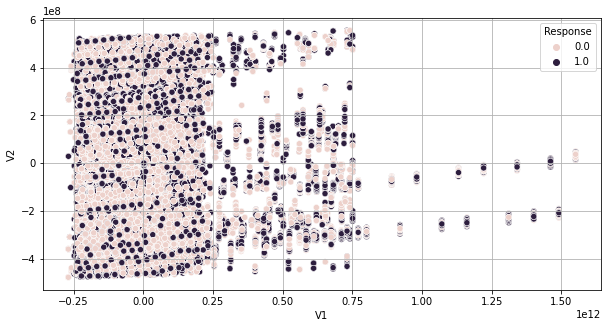

In [ ]:
from sklearn.decomposition import PCA
pca  = PCA()
pca.fit(x)

transformedFeatures = pca.transform(x)
## lets make this a dataFrame
dimReducedDataFrame = pd.DataFrame(transformedFeatures)
dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2', 2 : 'V3'})
dimReducedDataFrame['Response'] = y

## Plotting this
plt.figure(figsize = (10, 5))
sns.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2',hue = 'Response')
plt.grid(True)
plt.show()

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 2, shuffle = True, random_state = 10)

hyper_params = [ {'criterion' : ['gini', 'entropy'],
                     'max_depth': [None,1,2,3,4,5]}]


# specify model
model = DecisionTreeClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.5s finished


GridSearchCV(cv=KFold(n_splits=2, random_state=10, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.366050,0.011583,0.012962,0.000139,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.999803,0.999967,0.999885,0.000082,2,1.000000,1.000000,1.000000,0.000000
1,0.104057,0.000105,0.010916,0.000006,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.742238,0.738907,0.740573,0.001665,11,0.740651,0.741514,0.741082,0.000432
2,0.142136,0.012258,0.010975,0.000297,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.867024,0.868664,0.867844,0.000820,9,0.871493,0.864459,0.867976,0.003517
3,0.186382,0.006024,0.014463,0.000906,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.886594,0.883498,0.885046,0.001548,7,0.887478,0.885311,0.886395,0.001084
4,0.217925,0.017915,0.011769,0.000360,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.928694,0.926060,0.927377,0.001317,6,0.928001,0.926358,0.927179,0.000821
5,0.234847,0.013391,0.011726,0.000141,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.963788,0.955432,0.959610,0.004178,4,0.965135,0.957703,0.961419,0.003716
6,0.281282,0.002622,0.012315,0.000099,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.999770,1.000000,0.999885,0.000115,1,1.000000,1.000000,1.000000,0.000000
7,0.112899,0.004676,0.010780,0.000018,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.741514,0.738907,0.740211,0.001303,12,0.738907,0.741514,0.740211,0.001303
8,0.152115,0.000766,0.011707,0.001034,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.846402,0.850706,0.848554,0.002152,10,0.849850,0.847290,0.848570,0.001280
9,0.188691,0.005257,0.011653,0.000126,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.871892,0.873927,0.872909,0.001018,8,0.873434,0.872122,0.872778,0.000656


In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9998848835679516 corresponding to hyperparameters {'criterion': 'entropy', 'max_depth': None}


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
# use the model to make predictions with the test data
y_pred = dtree.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Misclassified samples: 0
Accuracy: 1.00


In [ ]:

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8076    0]
 [   0 7126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8076
           1       1.00      1.00      1.00      7126

    accuracy                           1.00     15202
   macro avg       1.00      1.00      1.00     15202
weighted avg       1.00      1.00      1.00     15202



In [ ]:
x.columns

Index(['pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
       'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow',
       'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'switch_1',
       'switch_10', 'switch_2', 'switch_3', 'switch_4', 'switch_5', 'switch_6',
       'switch_7', 'switch_8', 'switch_9', 'src_1', 'src_10', 'src_11',
       'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
       'src_2', 'src_20', 'src_3', 'src_4', 'src_5', 'src_6', 'src_7', 'src_8',
       'src_9', 'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP', 'dst_1',
       'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14', 'dst_15', 'dst_16',
       'dst_17', 'dst_18', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6',
       'dst_7', 'dst_8', 'dst_9', 'port_no_1', 'port_no_2', 'port_no_3',
       'port_no_4', 'port_no_5'],
      dtype='object')

In [ ]:
from sklearn import tree

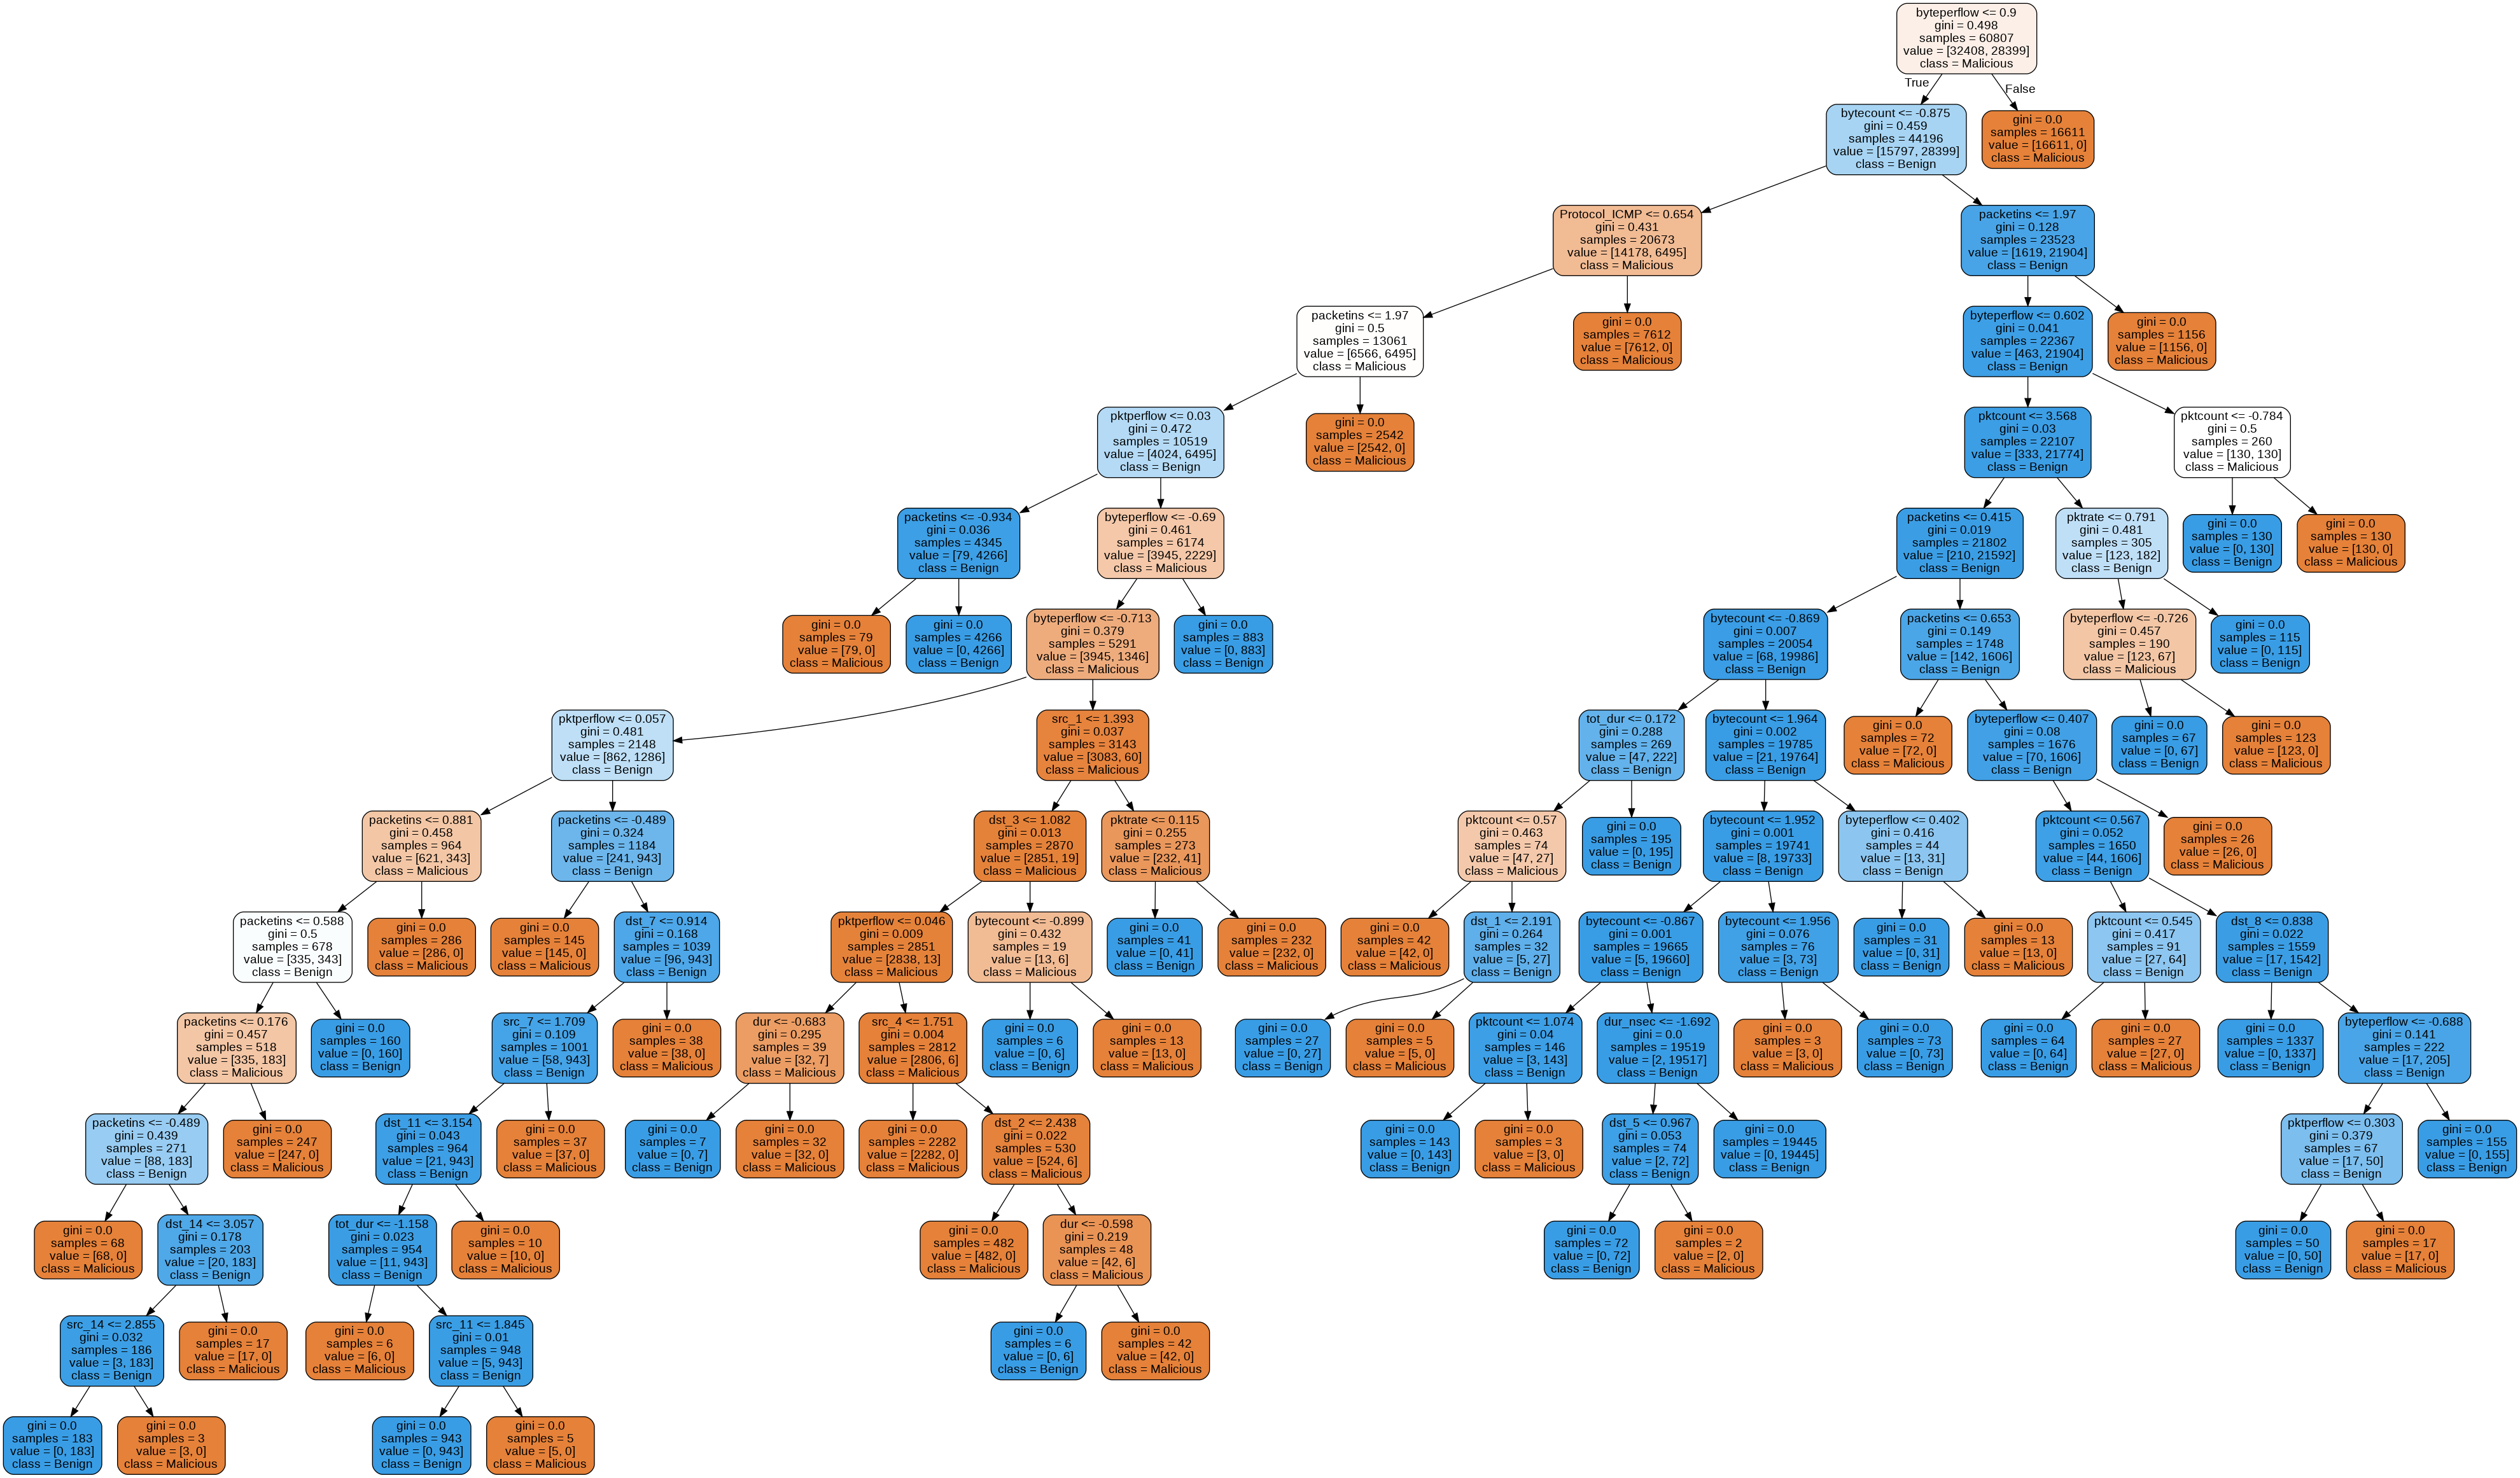

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt, pydotplus
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=['pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
       'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow',
       'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'switch_1',
       'switch_10', 'switch_2', 'switch_3', 'switch_4', 'switch_5', 'switch_6',
       'switch_7', 'switch_8', 'switch_9', 'src_1', 'src_10', 'src_11',
       'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
       'src_2', 'src_20', 'src_3', 'src_4', 'src_5', 'src_6', 'src_7', 'src_8',
       'src_9', 'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP', 'dst_1',
       'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14', 'dst_15', 'dst_16',
       'dst_17', 'dst_18', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6',
       'dst_7', 'dst_8', 'dst_9', 'port_no_1', 'port_no_2', 'port_no_3',
       'port_no_4', 'port_no_5'],  
                                class_names=['Malicious','Benign'])
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

#Logistic Regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

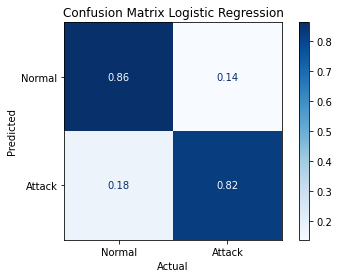

In [ ]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train, y_train) 
y_pred = lr.predict(x_test)
y_pred_l = lr.decision_function(x_test)
class_names=['Normal','Attack']
print(plot_confusion_matrix(lr, x_test,y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true'))
tp_l,fp_l,fn_l,tn_l = confusion_matrix(y_test, y_pred).ravel()
acc_l=(tp_l+tn_l)/(tp_l+fp_l+fn_l+tn_l)
rec_l=tp_l/(tp_l+fn_l)
rec_la=tn_l/(tn_l+fp_l)
pre_l=tp_l/(tp_l+fp_l)
pre_la=tn_l/(tn_l+fn_l)
fpr_l=fp_l/(fp_l+tn_l)
fnr_l=fn_l/(fn_l+tp_l)
f_l=2*pre_l*rec_l/(pre_l+rec_l)
f_la=2*pre_la*rec_la/(pre_la+rec_la)

data1=['LR',acc_l, pre_l, pre_la, rec_l, rec_la, f_l, f_la, fpr_l, fnr_l]

plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      8076
           1       0.84      0.82      0.83      7126

    accuracy                           0.84     15202
   macro avg       0.84      0.84      0.84     15202
weighted avg       0.84      0.84      0.84     15202



#SVC

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(0.5, 1.0, 'Confusion Matrix SVC')

Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

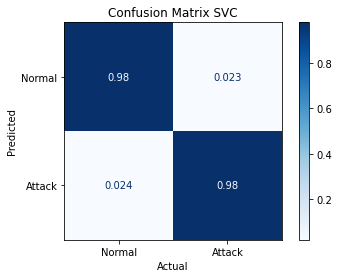

In [ ]:
svc = SVC(gamma='auto')
svc.fit(x_train, y_train) 
y_pred = svc.predict(x_test)
y_pred_s = svc.decision_function(x_test)
print(plot_confusion_matrix(svc, x_test,y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true'))
tp_s,fp_s,fn_s,tn_s = confusion_matrix(y_test, y_ped).ravel()
acc_s=(tp_s+tn_s)/(tp_s+fp_s+fn_s+tn_s)
rec_s=tp_s/(tp_s+fn_s)
pre_s=tp_s/(tp_s+fp_s)
fpr_s=fp_s/(fp_s+tn_s)
fnr_s=fn_s/(fn_s+tp_s)
f_s=2*pre_s*rec_s/(pre_s+rec_s)

pre_sa=tn_s/(tn_s+fn_s)
rec_sa=tn_s/(tn_s+fp_s)
f_sa=2*pre_sa*rec_sa/(pre_sa+rec_sa)

data2=['SVC',acc_s, pre_s, pre_sa, rec_s, rec_sa, f_s, f_sa, fpr_s, fnr_s]
plt.title('Confusion Matrix SVC')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
print('SVC Algo')
print(classification_report(y_test, y_pred))

SVC Algo
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8076
           1       0.97      0.98      0.97      7126

    accuracy                           0.98     15202
   macro avg       0.98      0.98      0.98     15202
weighted avg       0.98      0.98      0.98     15202



#RFC

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Text(0.5, 1.0, 'Confusion Matrix Random Forest')

Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

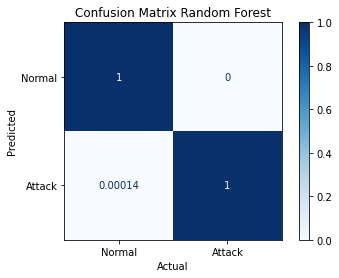

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train, y_train) 
y_pred_r = rf.predict(x_test)
print(plot_confusion_matrix(rf, x_test,y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true'))
tp_r,fp_r,fn_r,tn_r = confusion_matrix(y_test, y_prd).ravel()
acc_r=(tp_r+tn_r)/(tp_r+fp_r+fn_r+tn_r)
rec_r=tp_r/(tp_r+fn_r)
pre_r=tp_r/(tp_r+fp_r)
fpr_r=fp_r/(fp_r+tn_r)
fnr_r=fn_r/(fn_r+tp_r)
f_r=2*pre_r*rec_r/(pre_r+rec_r)

pre_ra=tn_r/(tn_r+fn_r)
rec_ra=tn_r/(tn_r+fp_r)
f_ra=2*pre_ra*rec_ra/(pre_ra+rec_ra)
data3=['RF',acc_r, pre_r, pre_ra, rec_r, rec_ra, f_r, f_ra, fpr_r, fnr_r]

plt.title('Confusion Matrix Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
print('RFC Algo')
print(classification_report(y_test, y_pred_r))

RFC Algo
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8076
           1       1.00      1.00      1.00      7126

    accuracy                           1.00     15202
   macro avg       1.00      1.00      1.00     15202
weighted avg       1.00      1.00      1.00     15202



In [ ]:
print('N:Normal ')
print('A:Attack')
headers = ('ML_DL ','Acc','N Prec','A Prec','N Rec','A Rec','N F-score','A F-score','FPR','FNR')

data = [data1, data2, data3]
print(tabulate(data, headers=headers, tablefmt='grid'))

N:Normal 
A:Attack
+----------+----------+----------+----------+----------+----------+-------------+-------------+-----------+-----------+
| ML_DL    |      Acc |   N Prec |   A Prec |    N Rec |    A Rec |   N F-score |   A F-score |       FPR |       FNR |
+==========+==========+==========+==========+==========+==========+=============+=============+===========+===========+
| LR       | 0.841929 | 0.861194 | 0.820095 | 0.844361 | 0.839052 |    0.852694 |    0.829466 | 0.160948  | 0.155639  |
+----------+----------+----------+----------+----------+----------+-------------+-------------+-----------+-----------+
| SVC      | 0.976253 | 0.976845 | 0.975582 | 0.97842  | 0.973806 |    0.977632 |    0.974693 | 0.0261941 | 0.0215801 |
+----------+----------+----------+----------+----------+----------+-------------+-------------+-----------+-----------+
| RF       | 1        | 1        | 1        | 1        | 1        |    1        |    1        | 0         | 0         |
+----------+---------

<Figure size 600x600 with 0 Axes>

Text(0.5, 0, '1-Specificity-->')

Text(0, 0.5, 'Sensitivity-->')

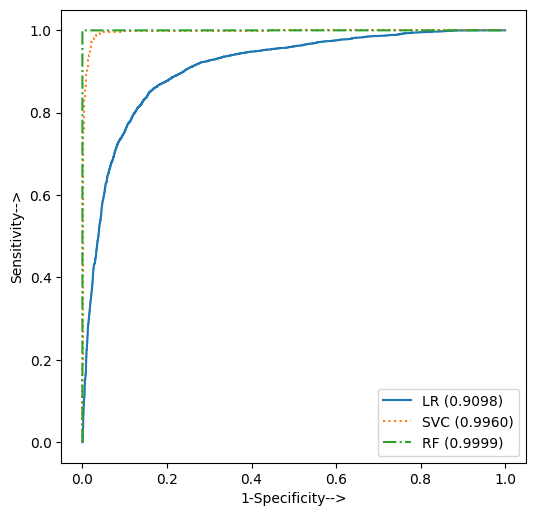

In [ ]:
l_fpr, l_tpr, threshold1 = roc_curve(y_test, y_pred_l)
s_fpr, s_tpr, threshold2 = roc_curve(y_test, y_pred_s)
r_fpr, r_tpr, threshold3 = roc_curve(y_test, y_pred_r)


auc_l = auc(l_fpr, l_tpr)
auc_s = auc(s_fpr, s_tpr)
auc_r = auc(r_fpr, r_tpr)

plt.figure(figsize=(6,6), dpi=100)
plt.plot(l_fpr, l_tpr, linestyle='-', label='LR (%.4f)' %auc_l)
plt.plot(s_fpr, s_tpr, linestyle=':', label='SVC (%.4f)' %auc_s)
plt.plot(r_fpr, r_tpr, linestyle='-.', label='RF (%.4f)' %auc_r)

plt.xlabel('1-Specificity-->')
plt.ylabel('Sensitivity-->')
plt.legend()

plt.show()